# Histogram Equalization for contrast adjustment

In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import data, img_as_float
from skimage import exposure

%matplotlib inline
#plt.style.use('fivethirtyeight')
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['figure.dpi'] = 80
plt.rcParams['savefig.dpi'] = 80
plt.rcParams['font.size'] = 14

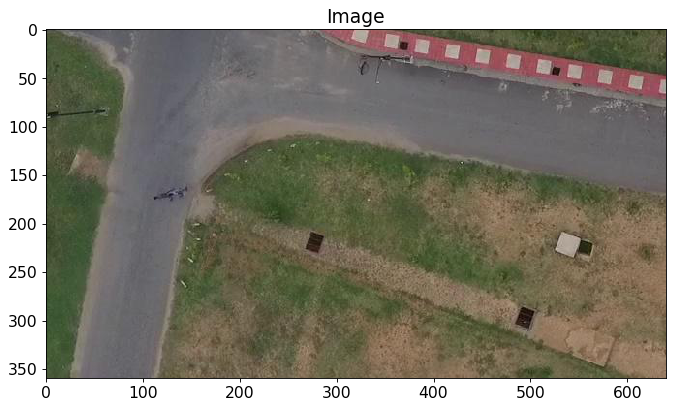

In [47]:
# Load data
cwd_path = 'dataset/image-cropped/'
img = cv2.imread(cwd_path + '5fqGUweJ8nyto8GIfImFOwqaEOGHiy.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Split channel 
R, G, B = cv2.split(img)
#img = cv2.merge((R, G,B))
plt.title("Image")   
plt.imshow(img)

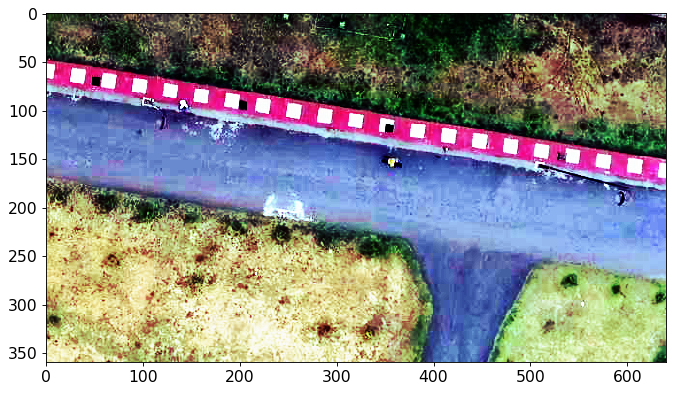

In [44]:
# Simple histogram Equalizer
output1_R = cv2.equalizeHist(R)
output1_G = cv2.equalizeHist(G)
output1_B = cv2.equalizeHist(B)
output1 = cv2.merge((output1_R, output1_G, output1_B))
cv2.imwrite(cwd_path + '5fqGUweJ8nyto8GIfImFOwqaEOGHiy-1.png', output1)
plt.imshow(output1)

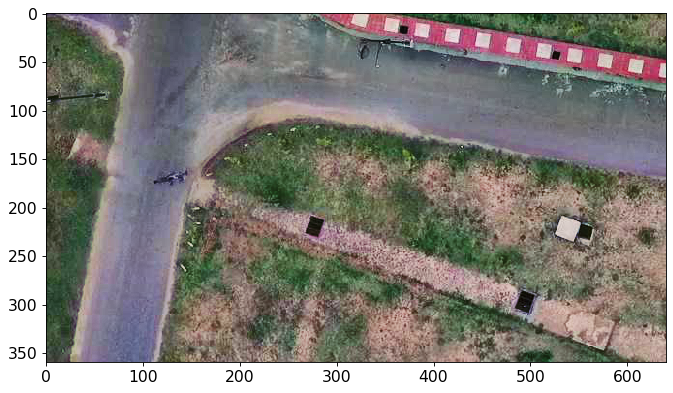

In [49]:
# Contrast Limited Adaptive Histogram Equalization
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
output2_R = clahe.apply(R)
output2_G = clahe.apply(G)
output2_B = clahe.apply(B)
output2 = cv2.merge((output2_R, output2_G, output2_B))
cv2.imwrite(cwd_path + '5fqGUweJ8nyto8GIfImFOwqaEOGHiy-1.png', output2)
plt.imshow(output2)

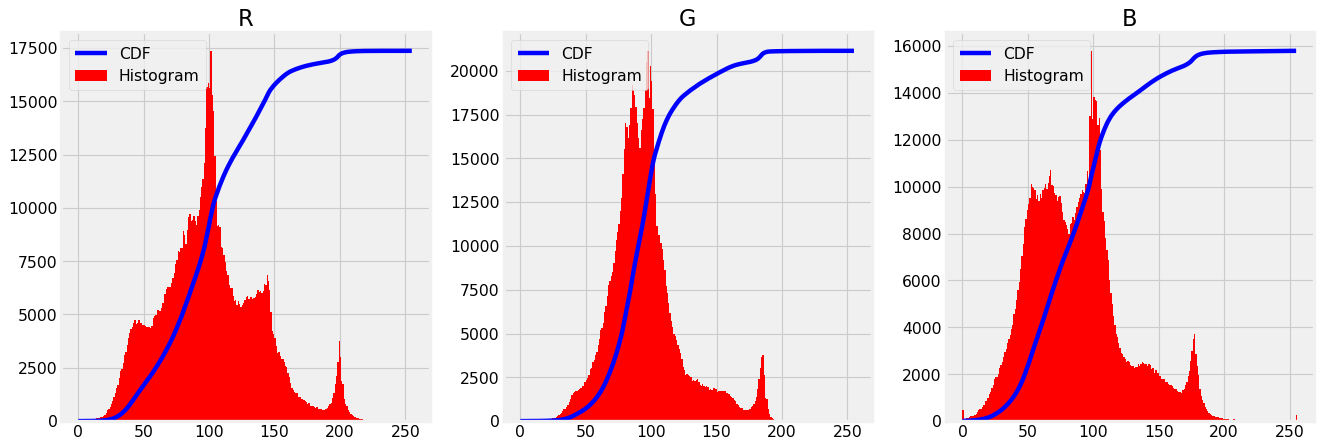

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True)

# RED
hist, bins = np.histogram(R.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()
axs[0].plot(cdf_normalized, color = 'b')
axs[0].hist(R.flatten(), 256, [0,256], color = 'r')
axs[0].set_title('R')
axs[0].legend(('CDF','Histogram'), loc = 'upper left')


# GREEN
hist, bins = np.histogram(G.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()
axs[1].plot(cdf_normalized, color = 'b')
axs[1].hist(G.flatten(), 256, [0,256], color = 'r')
axs[1].set_title('G')
axs[1].legend(('CDF','Histogram'), loc = 'upper left')

# BLUE
hist, bins = np.histogram(B.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()
axs[2].plot(cdf_normalized, color = 'b')
axs[2].hist(B.flatten(), 256, [0,256], color = 'r')
axs[2].set_title('B')
axs[2].legend(('CDF','Histogram'), loc = 'upper left')


plt.show()

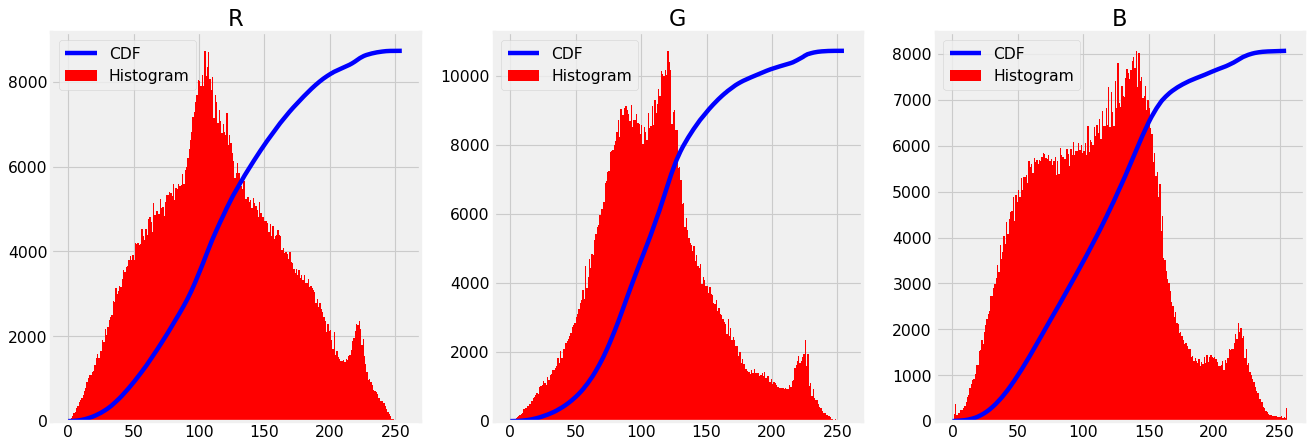

In [9]:
fig_2, axs_2 = plt.subplots(nrows=1, ncols=3, sharex=True)

# RED
hist, bins = np.histogram(output2_R.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()
axs_2[0].plot(cdf_normalized, color = 'b')
axs_2[0].hist(output2_R.flatten(), 256, [0,256], color = 'r')
axs_2[0].set_title('R')
axs_2[0].legend(('CDF','Histogram'), loc = 'upper left')


# GREEN
hist, bins = np.histogram(output2_G.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()
axs_2[1].plot(cdf_normalized, color = 'b')
axs_2[1].hist(output2_G.flatten(), 256, [0,256], color = 'r')
axs_2[1].set_title('G')
axs_2[1].legend(('CDF','Histogram'), loc = 'upper left')

# BLUE
hist, bins = np.histogram(output2_B.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()
axs_2[2].plot(cdf_normalized, color = 'b')
axs_2[2].hist(output2_B.flatten(), 256, [0,256], color = 'r')
axs_2[2].set_title('B')
axs_2[2].legend(('CDF','Histogram'), loc = 'upper left')


plt.show()

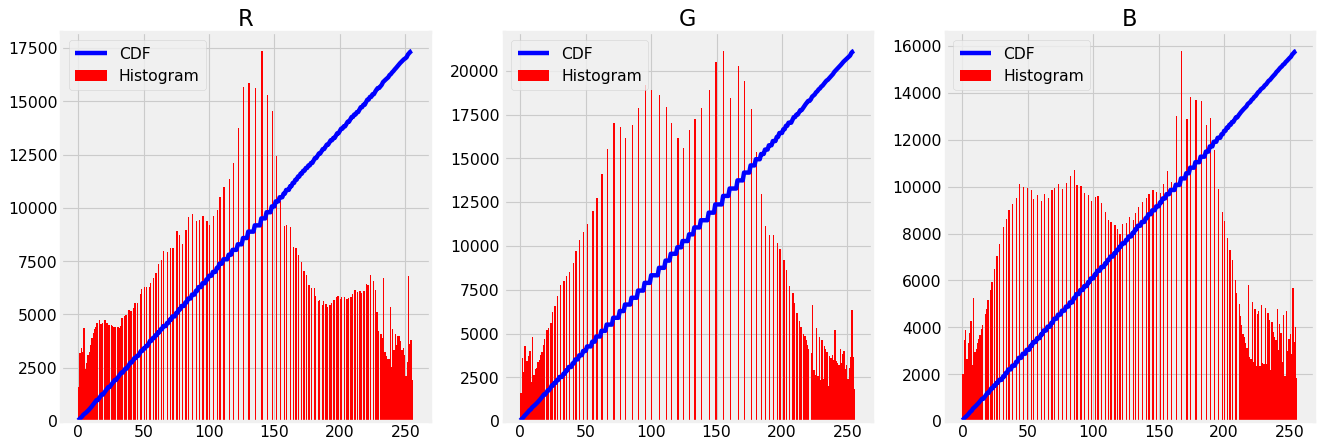

In [10]:
fig_3, axs_3 = plt.subplots(nrows=1, ncols=3, sharex=True)

# RED
hist, bins = np.histogram(output1_R.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()
axs_3[0].plot(cdf_normalized, color = 'b')
axs_3[0].hist(output1_R.flatten(), 256, [0,256], color = 'r')

#axs[0].xlim([0,256])
axs_3[0].set_title('R')
axs_3[0].legend(('CDF','Histogram'), loc = 'upper left')


# GREEN
hist, bins = np.histogram(output1_G.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()
axs_3[1].plot(cdf_normalized, color = 'b')
axs_3[1].hist(output1_G.flatten(), 256, [0,256], color = 'r')
axs_3[1].set_title('G')
axs_3[1].legend(('CDF','Histogram'), loc = 'upper left')

# BLUE
hist, bins = np.histogram(output1_B.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()
axs_3[2].plot(cdf_normalized, color = 'b')
axs_3[2].hist(output1_B.flatten(), 256, [0,256], color = 'r')
axs_3[2].set_title('B')
axs_3[2].legend(('CDF','Histogram'), loc = 'upper left')
plt.show()